C:\Users\isaac\AppData\Local\Temp\ipykernel_18824\1873340900.py:2: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  incarcerations = pd.read_csv('../state/AL/al_incarcerations_scraped.csv').drop(columns='collection_id')


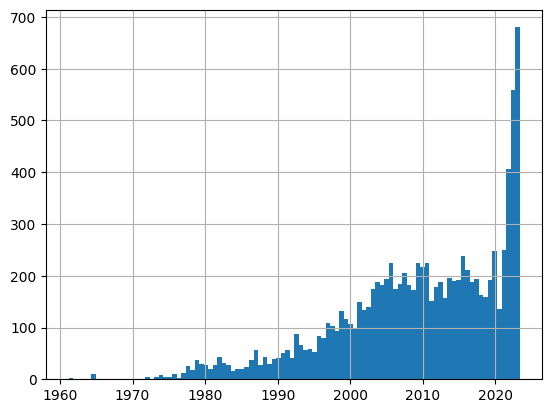

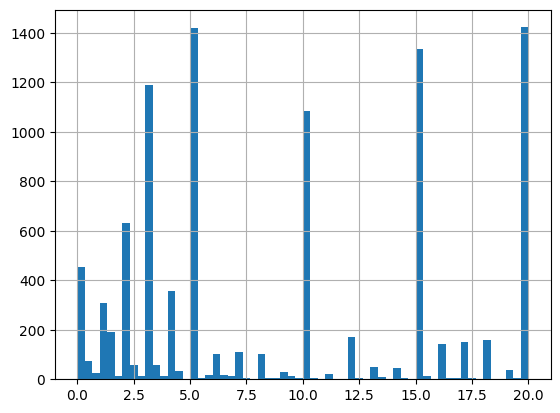

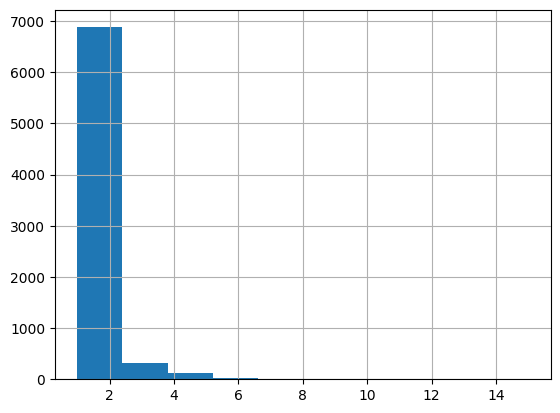

In [26]:
%run ./2023-05-08-AL-gun-mm-processing.ipynb

<AxesSubplot: >

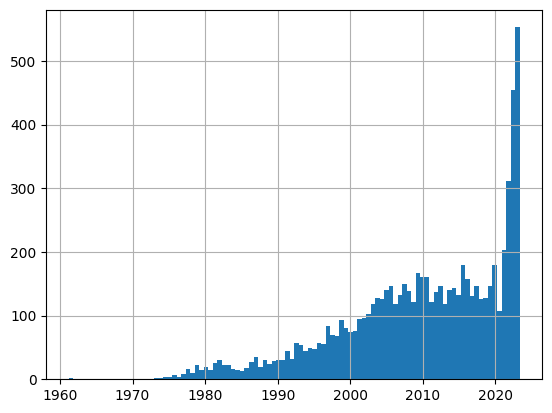

In [27]:
disag["admit_date"].hist(bins=100)

In [28]:
disag["t_start"] = (12 * (disag["admit_date"].dt.year - 2000) + round(disag["admit_date"].dt.month + disag["admit_date"].dt.day / 30)).astype(int)
disag["t_end"] = (disag["t_start"] + round(disag["time_served"] * 12)).astype(int)

In [29]:
populations = pd.DataFrame({
    "compartment": [],
    "time_step": [],
    "min_sentence": [],
    "total_population": []
})
steps = int(disag["t_start"].max())

for t in range(steps + 1):
    disag_t = disag[(disag["t_start"] <= t) & (disag["t_end"] >= t)]
    pop_min_sentence = (disag_t["min_sentence"] == "10").sum()
    pop_no_min_sentence = (disag_t["min_sentence"] == "0").sum()
    populations.loc[len(populations.index)] = ["prison", t, "10", pop_min_sentence]
    populations.loc[len(populations.index)] = ["prison", t, "0", pop_no_min_sentence]

In [30]:
populations["time_step"] = populations["time_step"] - 24 * 12

In [36]:
populations[populations["time_step"] == populations["time_step"].min()]

,compartment,time_step,min_sentence,total_population
0,prison,-288,10,15
1,prison,-288,0,594


<AxesSubplot: xlabel='time_step'>

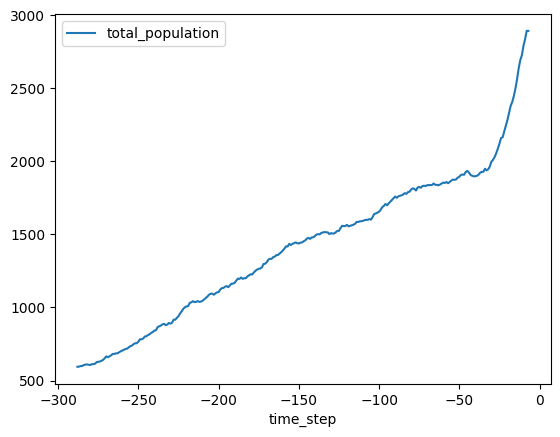

In [32]:
populations[populations["min_sentence"] == "0"].plot(x="time_step", y=["total_population"])

In [50]:
sentences["year"] = sentences["Sentenced"].apply(lambda x: int(x[-4:]))

<AxesSubplot: >

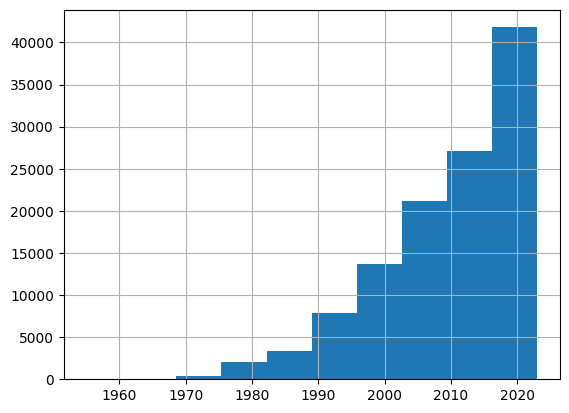

In [51]:
sentences["year"].hist()

In [54]:
disag["year"] = disag["Admit_Date"].apply(lambda x: int(x[-4:]))

<AxesSubplot: >

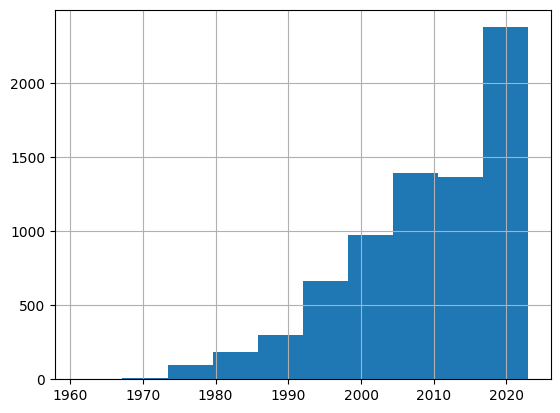

In [55]:
disag["year"].hist()

In [58]:
disag["time_left"] = disag["total_term"] + disag["good_time_revoked"] - (disag["good_time_received"] + disag["time_served"])
disag[disag["time_left"] < 0]["Offense"].unique()

array(['BURGLARY II (OLD CODE/PRIOR JAN 80)', 'ESCAPE I', 'BURGLARY II',
       'ASSAULT/INTENT MURDER', 'BURGLARY I (OLD CODE/PRIOR JAN 80)',
       'ASSAULT/INTENT ROB', 'ASSAULT II', 'MANSLAUGHTER', 'SODOMY II',
       'MURDER II', 'ROBBERY I', 'ARSON I', 'BURGLARY I', 'RAPE II',
       'SEXUAL ABUSE I', 'ARSON II', 'SODOMY I', 'ASSAULT I', 'RAPE I',
       'CHILD ABUSE', 'DISCHARGE GUN OCC BLDG/VEH',
       'DOMESTIC VIOLENCE II', 'KIDNAPPING II', 'MURDER',
       'XMIT OBSCENE MATERIAL TO CHILD COMPUTER', 'AGGRAVATED MURDER',
       'MURDER I'], dtype=object)